### Análisis de Flujo de Vehículos ###

Movimientos por Aparcamiento:
MovementTypeDesig  ENTRADA  SALIDA
APARCAMIENTO                      
ELDER                12779   12860
MATA                  6838    6846
METROPOL             16978   16984
NUEVOS JUZGADOS      12469   12469
RINCÓN               37431   37544
SAN BERNARDO         26960   27041
SANAPÚ               13070   13213
VEGUETA              30711   30772


Aparcamiento con mayor actividad: RINCÓN
Aparcamiento con menor actividad: MATA

Distribución de movimientos por hora del día:
MovementTypeDesig  ENTRADA  SALIDA
Hour                              
0                      389    2489
1                       93    1167
2                       57     706
3                       96     548
4                      199     197
5                     1207     275
6                     3333     952
7                     9462    1523
8                    14805    2661
9                    15586    5830
10                   12722    8

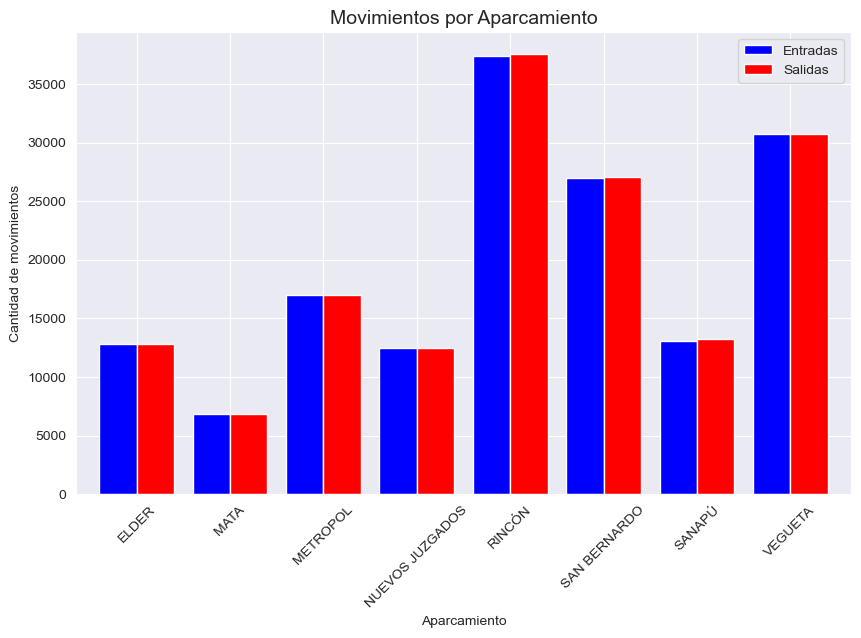

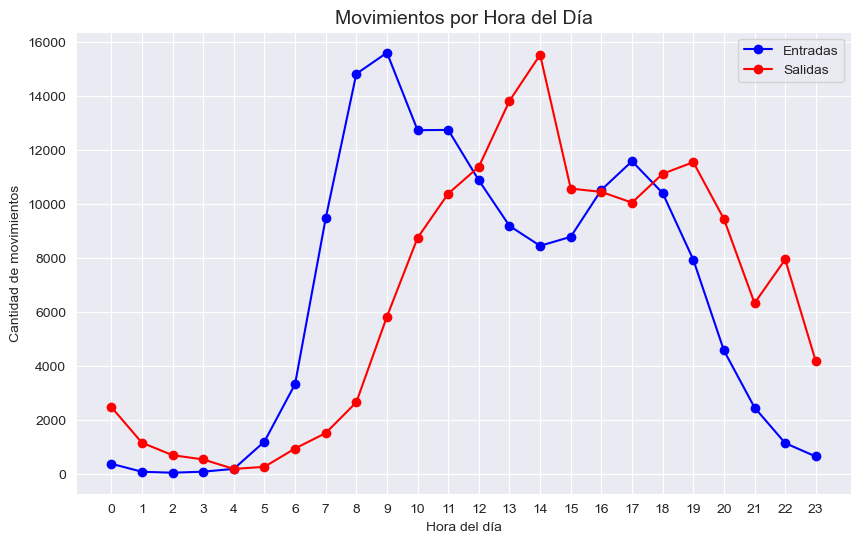

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo Excel
file_path = "APARCAMIENTOS-FEBRERO-2025.xlsx"  # Asegúrate de que el archivo esté en el mismo directorio
xls = pd.ExcelFile(file_path)

# Cargar la hoja de cálculo
df = pd.read_excel(xls, sheet_name="Sheet1")

# Extraer la hora de cada registro
df["Hour"] = pd.to_datetime(df["Time"]).dt.hour

# Contar la cantidad de entradas y salidas por aparcamiento
movimientos_por_aparcamiento = df.groupby(["APARCAMIENTO", "MovementTypeDesig"]).size().unstack()

# Contar los movimientos por hora del día
movimientos_por_hora = df.groupby(["Hour", "MovementTypeDesig"]).size().unstack()

# Mostrar el análisis en texto
print("### Análisis de Flujo de Vehículos ###\n")

# Movimientos por aparcamiento
print("Movimientos por Aparcamiento:")
print(movimientos_por_aparcamiento)
print("\n")

# Identificar los aparcamientos con mayor y menor actividad
aparcamiento_mas_activo = movimientos_por_aparcamiento.sum(axis=1).idxmax()
aparcamiento_menos_activo = movimientos_por_aparcamiento.sum(axis=1).idxmin()
print(f"Aparcamiento con mayor actividad: {aparcamiento_mas_activo}")
print(f"Aparcamiento con menor actividad: {aparcamiento_menos_activo}\n")

# Movimientos por hora
print("Distribución de movimientos por hora del día:")
print(movimientos_por_hora)
print("\n")

# Identificar las horas pico de entradas y salidas
hora_pico_entrada = movimientos_por_hora["ENTRADA"].idxmax()
hora_pico_salida = movimientos_por_hora["SALIDA"].idxmax()
print(f"Hora pico de entrada: {hora_pico_entrada}:00")
print(f"Hora pico de salida: {hora_pico_salida}:00\n")

# Configurar estilo de gráficos
sns.set_style("darkgrid")  # Alternativa válida a "seaborn-darkgrid"

# FIGURA 1: Entradas y salidas por aparcamiento
fig, ax = plt.subplots(figsize=(10, 6))
movimientos_por_aparcamiento.plot(kind="bar", ax=ax, width=0.8, color=["blue", "red"])
ax.set_title("Movimientos por Aparcamiento", fontsize=14)
ax.set_ylabel("Cantidad de movimientos")
ax.set_xlabel("Aparcamiento")
ax.legend(["Entradas", "Salidas"])
plt.xticks(rotation=45)
plt.show()

# FIGURA 2: Entradas y salidas por hora
fig, ax = plt.subplots(figsize=(10, 6))
movimientos_por_hora.plot(kind="line", marker="o", ax=ax, color=["blue", "red"])
ax.set_title("Movimientos por Hora del Día", fontsize=14)
ax.set_ylabel("Cantidad de movimientos")
ax.set_xlabel("Hora del día")
ax.legend(["Entradas", "Salidas"])
plt.xticks(range(0, 24))
plt.show()
